# **Spelling Correction**

## Configuration


You can download the data:
```python
!!curl -O http://www.manythings.org/anki/fra-eng.zip
!!unzip fra-eng.zip
```


In [ ]:
!nvidia-smi

Tue Sep 21 12:26:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/"Deep Learning AI4E 2021"/"Final Project"/data

/content/drive/MyDrive/Deep Learning AI4E 2021/Final Project/data


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


## Load & Clean Data


In [ ]:
num_samples = 23040
data_path = "fra.txt"

In [ ]:
# Vectorize the data.
input_extract = []
with open(data_path, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")
    for line in lines[100000:min(100000+num_samples, len(lines)-1)]:
        input_text, translated_text, _ = line.split("\t")
        input_extract.append(input_text)

In [ ]:
import re

def clean_characters(data):
    data = re.sub(r"[^0-9a-zA-Z' -]+","", data)
    return data

input_texts = []
for input in input_extract:
    input_texts.append(clean_characters(input))

In [ ]:
def extract_character(data):
    special_words = ["\t","\n"]
    set_words = set([character for line in data for character in line])
    int_to_vocab = {word_i: word for word_i, word in enumerate(special_words + list(set_words))}
    vocab_to_int = {word: word_i for word_i, word in int_to_vocab.items()}
    return int_to_vocab, vocab_to_int

int_to_vocab, vocab_to_int = extract_character(input_texts)

print(f'The vocabulary contains {len(vocab_to_int)} characters.')
print(sorted(vocab_to_int))

The vocabulary contains 66 characters.
['\t', '\n', ' ', "'", '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
input_texts[10:20]

["I'll always be there for you",
 "I'll always be there for you",
 "I'll apply for the job today",
 "I'll arrive on Christmas Day",
 "I'll ask my father for money",
 "I'll ask my mother for money",
 "I'll attend the next meeting",
 "I'll be back in a few months",
 "I'll be back in a few months",
 "I'll be back in half an hour"]

In [ ]:
characters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',]

def make_misspellings(sentence, threshold):
    misspellings = ''
    i = 0
    while i < len(sentence):
        random = np.random.uniform(0,1,1)
        if random < threshold:
            misspellings += sentence[i]
        else:
            new_random = np.random.uniform(0,1,1)
            # 25% chance characters will swap locations
            # Transpostion
            if new_random >= 0.75:
                if i == (len(sentence) - 1):
                    # if last character in sentence, it will be typed
                    misspellings += sentence[i]
                else:
                    # else, swap the order of the current character and the next one.
                    misspellings += sentence[i+1]
                    misspellings += sentence[i]
                    i += 1
                    
            # 25% chance a lowercase character will replace the current character
            # Subsitution
            elif new_random >= 0.5:
                random_letter = np.random.choice(characters, 1)[0]
                misspellings += random_letter

            # 25% chance a lowercase character will be inserted to the sentence
            # Insertion
            elif new_random >= 0.25:
                random_letter = np.random.choice(characters, 1)[0]
                r = np.random.uniform(0,1,1)
                if r >= 0.5:
                    misspellings += random_letter
                    misspellings += sentence[i]
                else:
                    misspellings += sentence[i]
                    misspellings += random_letter
                
            # 25%: skip a character
            # Deletion
            else:
                pass
        i += 1

    return misspellings

def generate_train_data(input_texts, threshold):
    train_inputs = []
    for input in input_texts:
        b = make_misspellings(input, threshold)
        train_inputs.append(b)
    return train_inputs

def generate_encoder_input(inputs):
    max_encoder_length = max([len(text) for text in inputs])
    encoder_input_data = np.zeros((num_samples,max_encoder_length,num_encoder_tokens),dtype="float32")
    for i,input in enumerate(inputs):
        for j,char in enumerate(input):
            encoder_input_data[i, j, vocab_to_int[char]] = 1.0
        encoder_input_data[i, j+1:, vocab_to_int[' ']] = 1.0
    return encoder_input_data

In [ ]:
test_inputs = []
threshold = 0.95

for input in input_texts:
    a = "\t" + input + "\n"
    test_inputs.append(a)

train_inputs = generate_train_data(input_texts, threshold)

In [ ]:
len(train_inputs)

23040

In [ ]:
for i in range(20000,20020):
    print(train_inputs[i])
    print(test_inputs[i][1:])
    print()

I was too scared to do anything
I was too scared to do anything


I was too scfarel to do anythincg
I was too scared to do anything


I was trying to prove something
I was trying to prove something


I was wyiting for that question
I was waiting for that question


I was vriting her a lve lejtter
I was writing her a love letter


I wasnc't comptlaening about that
I wasn't complaining about that


I wasn't listening to the radio
I wasn't listening to the radio


I wasn't planning on dfoing that
I wasn't planning on doing that


I wasn't preset at the meeting
I wasn't present at the meeting


I wasn't reauly certain of that
I wasn't really certain of that


I wasn't realqly certain of tht
I wasn't really certain of that


I wasn't sure I could trust ypu
I wasn't sure I could trust you


I wasn't the one who kisdsed Tom
I wasn't the one who kissed Tom


I wasn't th eone who wrote this
I wasn't the one who wrote this


Iwasn't rtyinwg to hurt anybody
I wasn't trying to hurt anybody


Iq wa

In [ ]:
num_encoder_tokens = len(vocab_to_int)
num_decoder_tokens = len(vocab_to_int)
max_encoder_length = max([len(text) for text in train_inputs])
max_decoder_length = max([len(text) for text in test_inputs])

print("Number of samples:", num_samples)
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_length)
print("Max sequence length for outputs:", max_decoder_length)

Number of samples: 23040
Number of unique input tokens: 66
Number of unique output tokens: 66
Max sequence length for inputs: 35
Max sequence length for outputs: 33


In [ ]:
encoder_input_data = generate_encoder_input(train_inputs)

decoder_input_data = np.zeros(
    (num_samples, max_decoder_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (num_samples, max_decoder_length, num_decoder_tokens), dtype="float32"
)

for i, test_input in enumerate(test_inputs):
    for t, char in enumerate(test_input):
        decoder_input_data[i, t, vocab_to_int[char]] = 1.0
        if t > 0:
            decoder_target_data[i, t - 1, vocab_to_int[char]] = 1.0
    decoder_input_data[i, t + 1 :, vocab_to_int[" "]] = 1.0
    decoder_target_data[i, t:, vocab_to_int[" "]] = 1.0

In [ ]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(23040, 35, 66)
(23040, 33, 66)
(23040, 33, 66)


## Model


In [ ]:
batch_size = 128
latent_dim = 512
threshold = 0.95


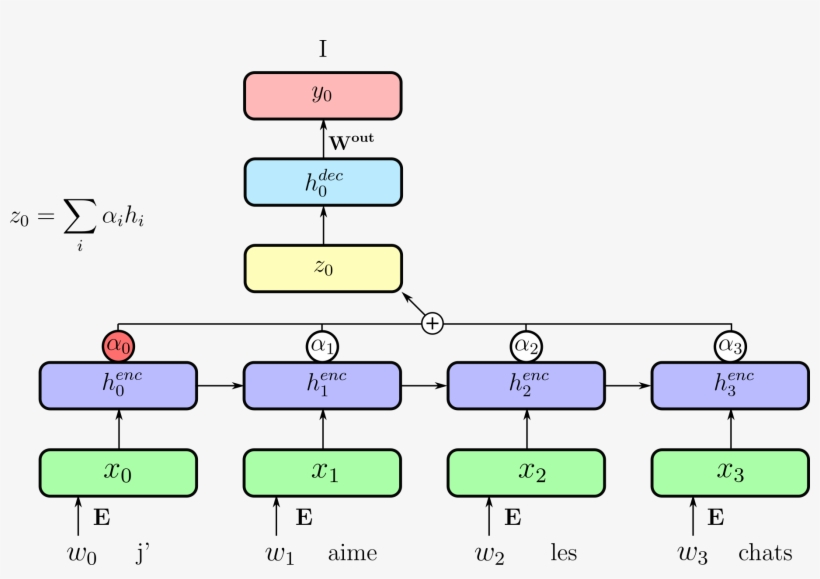

- ```keras.backend.concatenate```: concatenates a list of tensors alongside the specified axis.
- ```keras.layers.Lambda```: exists so that arbitrary expressions can be used as a Layer when constructing Sequential and Functional API models.
- ```tf.concat(values, axis, name)```: concatenates tensors along one dimension.
- ```tf.reduct_sum```: computes the sum of elements across dimensions of a tensor.
- ```axis=-1```: 3-rd dimension.

In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, latent_dim):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(latent_dim)
        self.W2 = tf.keras.layers.Dense(latent_dim)
        self.V = tf.keras.layers.Dense(1)

    def __call__(self, h_t, h_s):
        # h_t: previous hidden state of decoder
        # h_s: all hidden states of encoder
        
        h_t_with_axis = tf.expand_dims(h_t, 1)

        score = self.V(keras.activations.tanh(self.W1(h_t_with_axis) + self.W2(h_s)))

        attention_weights = keras.activations.softmax(score, axis=1)

        context_vector = attention_weights * h_s
        
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector


In [ ]:
def build_model(num_encoder_tokens, num_decoder_tokens, latent_dim, dropout=0.4):
    encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
    encoder_bilstm = keras.layers.Bidirectional(keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, dropout=dropout))
    encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_bilstm(encoder_inputs)

    encoder_states = [forward_h, forward_c, backward_h, backward_c]

    attention= BahdanauAttention(2*latent_dim)

    decoder_inputs = keras.Input(shape=(None, (num_decoder_tokens + 2*latent_dim))) # previous hidden state + context vector
    decoder_bilstm = keras.layers.Bidirectional(keras.layers.LSTM(latent_dim, return_state=True, dropout=dropout))
    decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")

    all_outputs = []

    inputs = np.zeros((batch_size, 1, num_decoder_tokens), dtype="float32")
    inputs[:, 0, 0] = 1

    decoder_outputs = keras.layers.Concatenate()([forward_h, backward_h])
    states = encoder_states

    for _ in range(max_decoder_length):

        context_vector = attention(decoder_outputs, encoder_outputs)

        context_vector = tf.expand_dims(context_vector, 1)

        inputs = keras.activations.tanh(tf.concat([context_vector, inputs], axis=-1))

        decoder_outputs, forward_h, forward_c, backward_h, backward_c = decoder_bilstm(inputs, initial_state=states)
        outputs = decoder_dense(decoder_outputs)

        outputs = tf.expand_dims(outputs, 1)
        
        all_outputs.append(outputs)

        inputs = outputs
        states = [forward_h, forward_c, backward_h, backward_c]

    # convert the list to output array by Concatenating all predictions 
    decoder_outputs = keras.layers.Lambda(lambda x: keras.backend.concatenate(x, axis=1))(all_outputs)

    model_attention = keras.Model(encoder_inputs, decoder_outputs)

    return model_attention

model_attention = build_model(num_encoder_tokens, num_decoder_tokens, latent_dim, 0.1)

model_attention.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 66)]   0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, None, 1024), 2371584     input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 1024)         0           bidirectional[0][1]              
                                                                 bidirectional[0][3]              
__________________________________________________________________________________________________
tf.expand_dims (TFOpLambda)     (None, 1, 1024)      0           concatenate[0][0]            

## Training


In [ ]:
epochs = 50

In [ ]:
model_attention.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

h_loss = []
h_accuracy = []

for i in range(epochs):
    print(f'Epoch {i+1}/{epochs}')
    h = model_attention.fit(
        encoder_input_data,
        decoder_target_data,
        batch_size=batch_size,
        epochs=1,
    )
    h_loss.append(h.history["loss"])
    h_accuracy.append(h.history["accuracy"])
    train_inputs = generate_train_data(input_texts,threshold)
    encoder_input_data = generate_encoder_input(train_inputs)


Epoch 1/50
180/180 [==============================] - 287s 1s/step - loss: 2.7159 - accuracy: 0.2509
Epoch 2/50
180/180 [==============================] - 186s 1s/step - loss: 1.9125 - accuracy: 0.3714
Epoch 3/50
180/180 [==============================] - 186s 1s/step - loss: 1.0839 - accuracy: 0.6276
Epoch 4/50
180/180 [==============================] - 235s 1s/step - loss: 0.9243 - accuracy: 0.6824
Epoch 5/50
180/180 [==============================] - 186s 1s/step - loss: 0.8261 - accuracy: 0.7123
Epoch 6/50
180/180 [==============================] - 248s 1s/step - loss: 0.7629 - accuracy: 0.7360
Epoch 7/50
180/180 [==============================] - 187s 1s/step - loss: 0.7346 - accuracy: 0.7489
Epoch 8/50
180/180 [==============================] - 186s 1s/step - loss: 0.7146 - accuracy: 0.7581
Epoch 9/50
180/180 [==============================] - 186s 1s/step - loss: 0.6611 - accuracy: 0.7805
Epoch 10/50
180/180 [==============================] - 186s 1s/step - loss: 0.6238 - accura

In [ ]:
# Save model
model_attention.save("./model_2.h5")


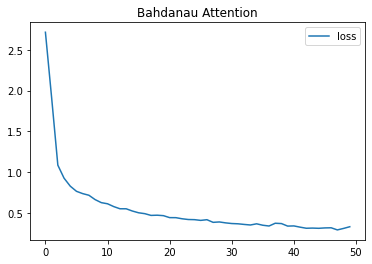

In [ ]:
import matplotlib.pyplot as plt
plt.title('Bahdanau Attention')
plt.plot(h_loss,label="loss")
plt.legend()
plt.show()

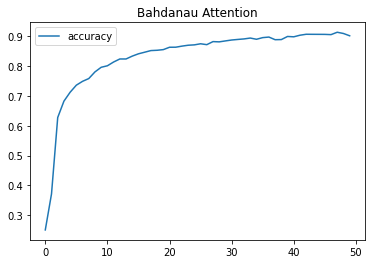

In [ ]:
plt.title('Bahdanau Attention')
plt.plot(h_accuracy,label="accuracy")
plt.legend()
plt.show()

In [ ]:
epochs = 25

for i in range(epochs):
    print(f'Epoch {i+1}/{epochs}')
    h = model_attention.fit(
        encoder_input_data,
        decoder_target_data,
        batch_size=batch_size,
        epochs=1,
    )
    h_loss.append(h.history["loss"])
    h_accuracy.append(h.history["accuracy"])
    train_inputs = generate_train_data(input_texts,threshold)
    encoder_input_data = generate_encoder_input(train_inputs)

Epoch 1/25
180/180 [==============================] - 189s 1s/step - loss: 0.3026 - accuracy: 0.9094
Epoch 2/25
180/180 [==============================] - 189s 1s/step - loss: 0.3162 - accuracy: 0.9049
Epoch 3/25
180/180 [==============================] - 184s 1s/step - loss: 0.2874 - accuracy: 0.9138
Epoch 4/25
180/180 [==============================] - 184s 1s/step - loss: 0.2923 - accuracy: 0.9132
Epoch 5/25
180/180 [==============================] - 189s 1s/step - loss: 0.2836 - accuracy: 0.9158
Epoch 6/25
180/180 [==============================] - 189s 1s/step - loss: 0.2832 - accuracy: 0.9164
Epoch 7/25
180/180 [==============================] - 189s 1s/step - loss: 0.2816 - accuracy: 0.9166
Epoch 8/25
180/180 [==============================] - 189s 1s/step - loss: 0.2928 - accuracy: 0.9145
Epoch 9/25
180/180 [==============================] - 189s 1s/step - loss: 0.2869 - accuracy: 0.9149
Epoch 10/25
180/180 [==============================] - 192s 1s/step - loss: 0.2840 - accura

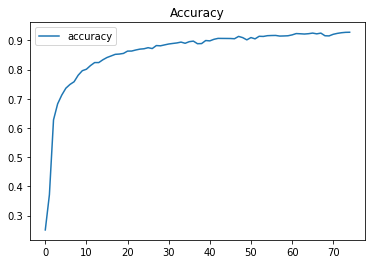

In [ ]:
plt.title('Accuracy')
plt.plot(h_accuracy,label="accuracy")
plt.legend()
plt.show()

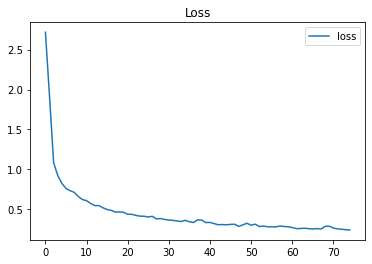

In [ ]:
plt.title('Loss')
plt.plot(h_loss,label="loss")
plt.legend()
plt.show()

In [ ]:
model_attention.save("./model_2.h5")

## Inference

Let's look at the training dataset!

In [ ]:
model_attention = keras.models.load_model("./model_2.h5")

In [ ]:
outputs = model_attention.predict(encoder_input_data,batch_size=128)
predictions = []
for prediction in outputs:
  sentence = ""
  for char in prediction:
    c = int_to_vocab[np.argmax(char)]
    if c != "\n":
      sentence += c
    if c == "\n":
      break
  predictions.append(sentence)

I: input to the model

O: ouput generated by the model

C: correct output

In [ ]:
for i in range(100,120):
  if len(predictions[i]) == len(input_texts[i]): # if the length of a 
  # prediction is equal to the length of the correct output, the result is
  # likely to be correct
    print(f"I: {train_inputs[i]}")
    print(f"O: {predictions[i]}")
    print(f"C: {input_texts[i]}")
    print()

I: I'm afraid I've offended you
O: I'm afraid I've offended you
C: I'm afraid I've offended you

I: 'Im afraid I've offended you
O: I'm afraid I've offended you
C: I'm afraid I've offended you

I: I'm afraid I've oefeuded you
O: I'm afraid I've befeuded you
C: I'm afraid I've offended you

I: q'm afrair of the same thing
O: I'm afraid of the same thing
C: I'm afraid of the same thing

I: I'm afraid that's impossible
O: I'm afraid that's impossible
C: I'm afraid that's impossible

I: I'm afraid the rvumor is true
O: I'm afraid the rumor is true
C: I'm afraid the rumor is true

I: I'm afraid the rumor is tre
O: I'm afraid the rumor is tree
C: I'm afraid the rumor is true

I: I'm afraid to tell the truth
O: I'm afraid to tell the truth
C: I'm afraid to tell the truth

I: I'm afrayid we can't help you
O: I'm afraid we can't help you
C: I'm afraid we can't help you

I: I'm afraid we can't help you
O: I'm afraid we can't help you
C: I'm afraid we can't help you

I: I'm afraid we have a probl

Let's look at the random generated dataset.

In [ ]:
train_inputs = generate_train_data(input_texts,threshold)
encoder_input_data = generate_encoder_input(train_inputs)

In [ ]:
outputs = model_attention.predict(encoder_input_data,batch_size=128)
predictions = []
for prediction in outputs:
  sentence = ""
  for char in prediction:
    c = int_to_vocab[np.argmax(char)]
    if c != "\n":
      sentence += c
    if c == "\n":
      break
  predictions.append(sentence)

In [ ]:
for i in range(22000,num_samples):
  if len(predictions[i]) == len(input_texts[i]):
    print(f"I: {train_inputs[i]}")
    print(f"O: {predictions[i]}")
    print(f"C: {input_texts[i]}")
    print()

I: Txhsi aprt of town is very noisy
O: This aart of twn  ssvery noossy
C: This part of town is very noisy

I: This phrase seets correct to me
O: This prrase seets correct to me
C: This phrase seems correct to me

I: This place is open to everybody
O: This place is open to everybody
C: This place is open to everybody

I: This question has often come up
O: This question has often come up
C: This question has often come up

I: This recipe is my grandmother's
O: This recipe is my grandmother's
C: This recipe is my grandmother's

I: This school was founded in 170
O: This school was founded in 1600
C: This school was founded in 1970

I: This sentence contains an eror
O: This sentence contains an eroor
C: This sentence contains an error

I: This sentence contains ane rror
O: This sentence contains an  rror
C: This sentence contains an error

I: This sparrow's wings are broken
O: This sparrow's wings are broken
C: This sparrow's wings are broken

I: This stone is tojo heavyjto lift
O: This sto

Data generated by hand

In [ ]:
train_inputs = [
                "Tom los weight very quicklyy",
                "Tom loves to go out att night",
                "I see no reason to continuee",
                "Yesterdy I bought a red carr",
                "I speak Frnch occasionallyy",
                "When did you becme a teacher",
                "When will they gve a concert",
                "Who are yo going to vote for",
                "Why re you making me do this",
                "You alwys destroyy everythingg",

]
encoder_input_data = generate_encoder_input(train_inputs)

In [ ]:
correct_inputs = [
                "Tom lost weight very quickly",
                "Tom loves to go out at night",
                "I see no reason to continue",
                "Yesterday I bought a red car",
                "I speak French occasionally",
                "When did you become a teacher",
                "When will they give a concert",
                "Who are you going to vote for",
                "Why are you making me do this",
                "You always destroy everything",
]

In [ ]:
outputs = model_attention.predict(encoder_input_data,batch_size=128)
predictions = []
for prediction in outputs:
  sentence = ""
  for char in prediction:
    c = int_to_vocab[np.argmax(char)]
    if c != "\n":
      sentence += c
    if c == "\n":
      break
  predictions.append(sentence)

In [ ]:
for i in range(len(train_inputs)):
  print(f"I: {train_inputs[i]}")
  print(f"O: {predictions[i]}")
  print(f"C: {correct_inputs[i]}")
  print()

I: Tom los weight very quicklyy
O: Tom losw wiihh very quickly
C: Tom lost weight very quickly

I: Tom loves to go out att night
O: Tom loves to go out at night
C: Tom loves to go out at night

I: I see no reason to continuee
O: I see no reason to continue
C: I see no reason to continue

I: Yesterdy I bought a red carr
O: Yesterday I bought a red car
C: Yesterday I bought a red car

I: I speak Frnch occasionallyy
O: I speak French ocaassonally
C: I speak French occasionally

I: When did you becme a teacher
O: When did you become a teacher
C: When did you become a teacher

I: When will they gve a concert
O: When will they gave a concert
C: When will they give a concert

I: Who are yo going to vote for
O: Who are you going to vote for
C: Who are you going to vote for

I: Why re you making me do this
O: Why are you making me do this
C: Why are you making me do this

I: You alwys destroyy everythingg
O: You always destroy everythingg
C: You always destroy everything

